In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
# %matplotlib inline
from tqdm import tqdm_notebook as tqdm
import time
from scipy.optimize import differential_evolution
from skimage.measure import compare_ssim as ssim
import copy

In [2]:
def mse(x, y):
    return np.linalg.norm(x - y)

In [3]:
global histFigNum
histFigNum = 1

In [4]:
def objFunctionValue(GivenImage):
    global histFigNum
    tempObjValue = 0
    tempObjEntropyValue = 0
    tempObjAvg_GradValue = 0
    TotalNumberOfPixelsInImage = (GivenImage.shape[0])*(GivenImage.shape[1])
    for i in range(0,GivenImage.shape[-1]):
        image = GivenImage[:,:,i]
        probDensity, _ = np.histogram(image, 256, [0, 256])
        probDensity = probDensity/TotalNumberOfPixelsInImage
        if(0):
            plt.plot(np.arange(0, 256, 1), probDensity, color='red')
            plt.fill_between(np.arange(0, 256, 1), probDensity, color='red')
            plt.savefig(str(histFigNum)+'thHistogram.jpg')
        histFigNum += 1		
        NonZeroNewProbDensity = probDensity[probDensity > 0]
        entropy = -1*np.sum(NonZeroNewProbDensity*np.log2(NonZeroNewProbDensity))
        #dy, dx = np.gradient(image)
        #avg_gradient = np.sum(np.sqrt((dy**2)+(dx**2)))/TotalNumberOfPixelsInImage
        tempMean = np.sum(range(0,256)*probDensity)
        tempVariance = np.sum(((range(0,256)-tempMean)**2)*probDensity)
        avg_gradient = tempVariance
        tempObjEntropyValue += entropy
        tempObjAvg_GradValue += avg_gradient
        tempObjValue += (entropy+avg_gradient)
    return tempObjValue,tempObjEntropyValue,tempObjAvg_GradValue

In [5]:
Resources = "EnhancedAndGivenImagesTurbidDataSetUsingVarianceApproach/"

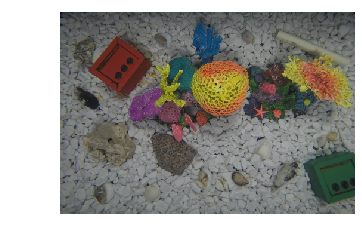

In [6]:
OriginalImage = cv2.imread(Resources+"RealImage.png")
OriginalImage = cv2.cvtColor(OriginalImage, cv2.COLOR_BGR2RGB)
plt.imshow(OriginalImage.astype(np.uint8))
plt.axis('off')
plt.show()

In [7]:
ObjFuncValueForEachImage = []
EntropyObjFuncValueForEachImage = []
AvgGradObjFuncValueForEachImage = []
SDIValueForEachImage  = []
#MSEValueForEachImage = []
TurbidMSEValueForEachImage = []
EnhancedMSEValueForEachImage = []

Image Number:  2


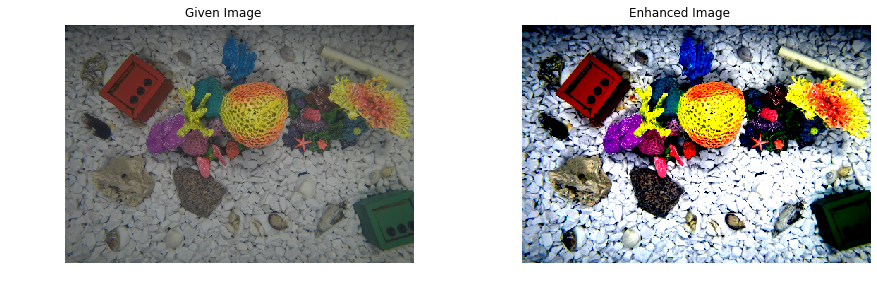

SDI Value for this Image
0.02281197637901513
Image Number:  3


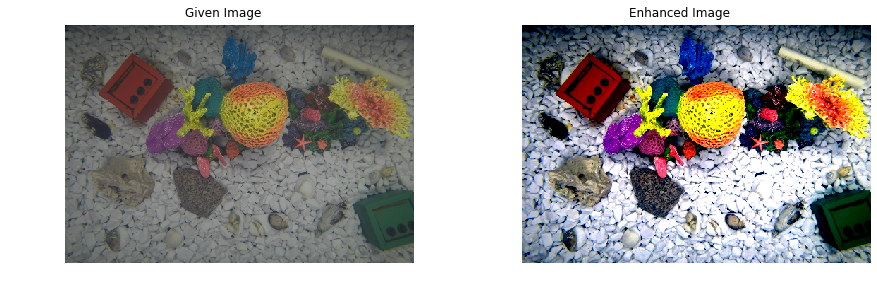

SDI Value for this Image
0.04639309926808741
Image Number:  4


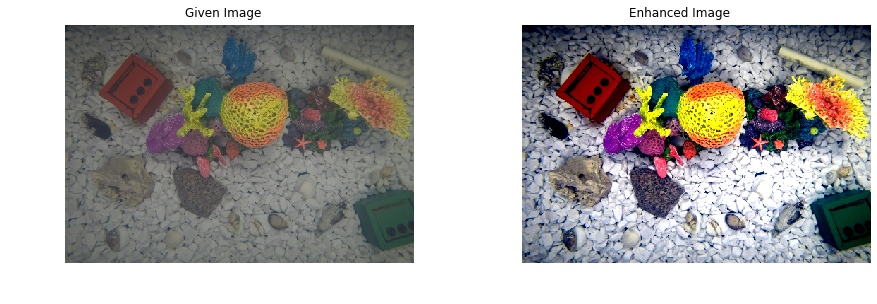

SDI Value for this Image
0.08575091134965511
Image Number:  5


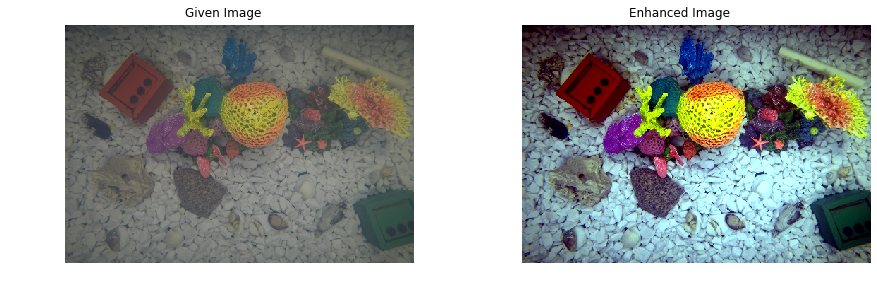

SDI Value for this Image
0.14279101215820877
Image Number:  6


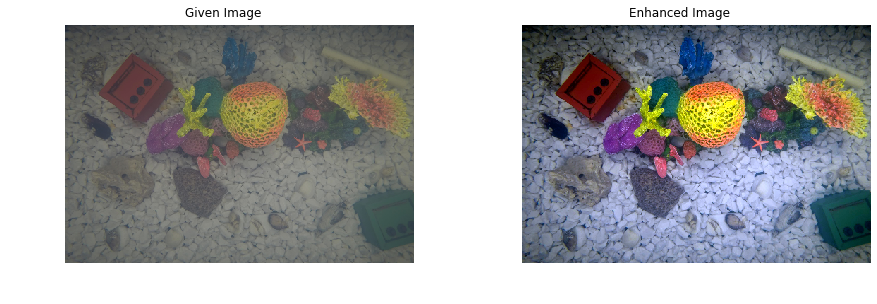

SDI Value for this Image
0.2315700671045491
Image Number:  7


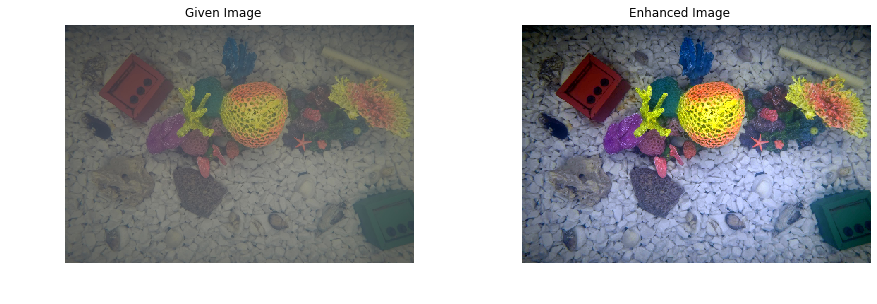

SDI Value for this Image
0.29994418288173785
Image Number:  8


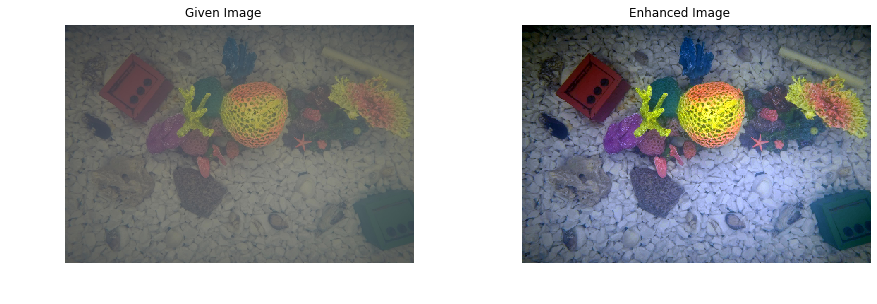

SDI Value for this Image
0.41271839041322
Image Number:  9


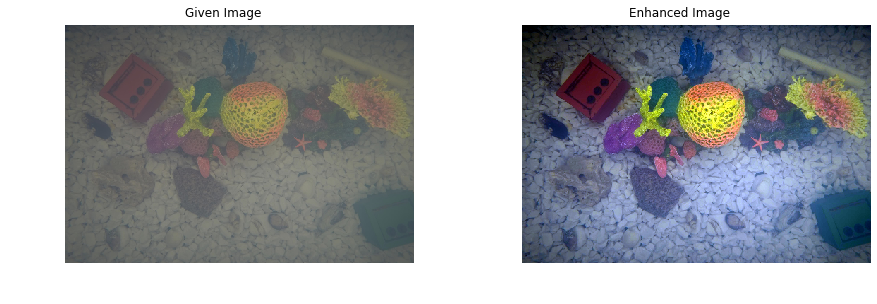

SDI Value for this Image
0.4639692756190453
Image Number:  10


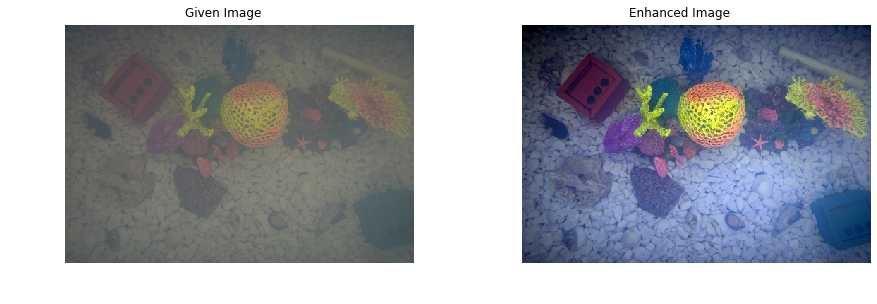

SDI Value for this Image
0.5616420110244205
Image Number:  11


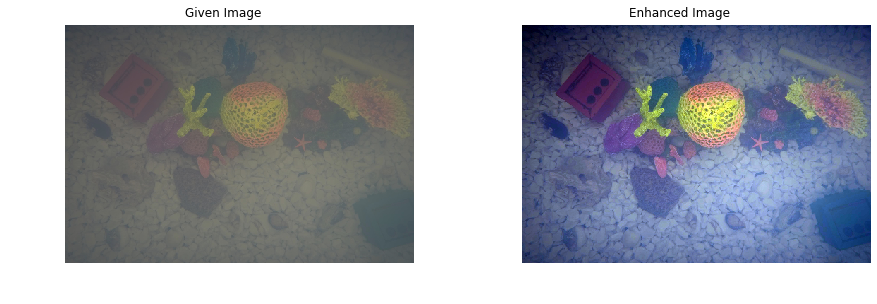

SDI Value for this Image
0.6612252325115231
Image Number:  12


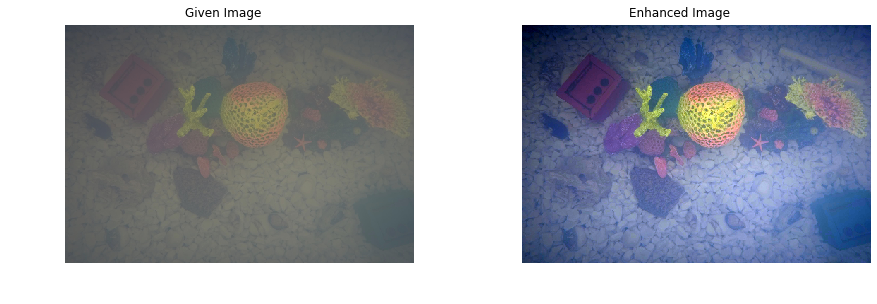

SDI Value for this Image
0.7201569284286014
Image Number:  13


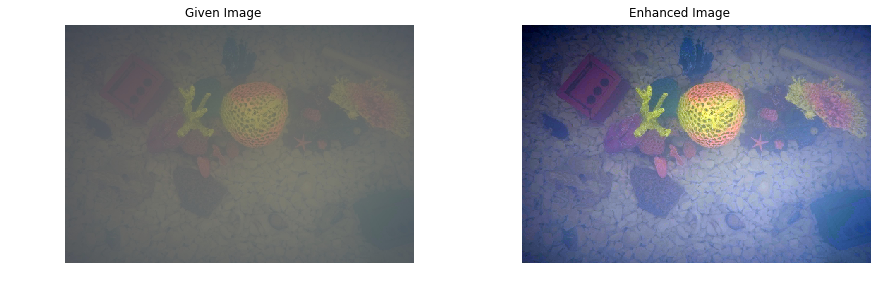

SDI Value for this Image
0.8322463760715137
Image Number:  14


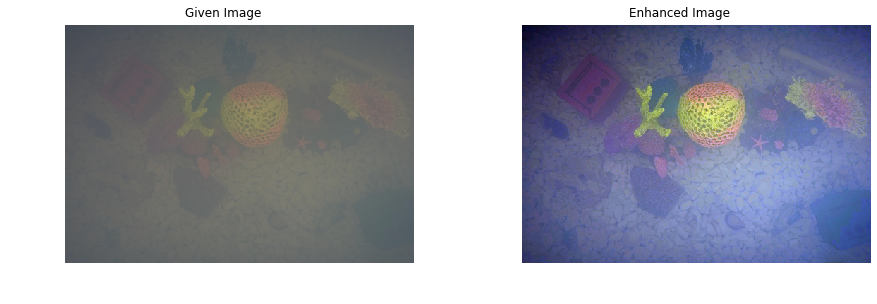

SDI Value for this Image
0.8647435673032088
Image Number:  15


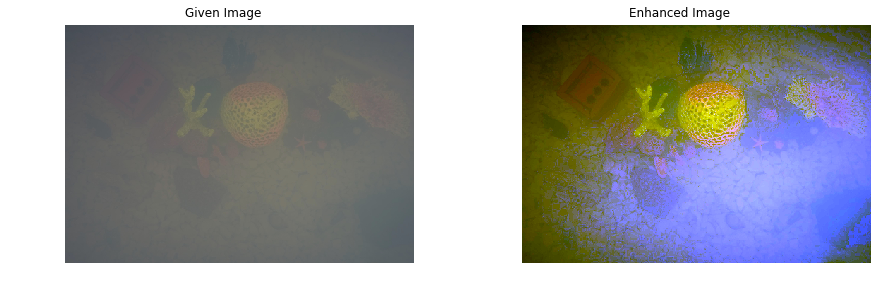

SDI Value for this Image
0.9149877981109132
Image Number:  16


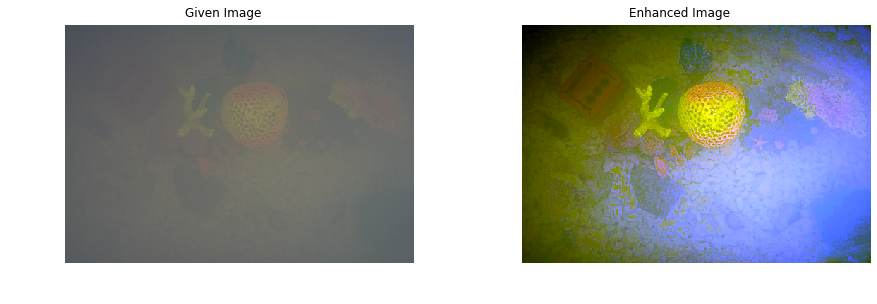

SDI Value for this Image
0.9413740924596049
Image Number:  17


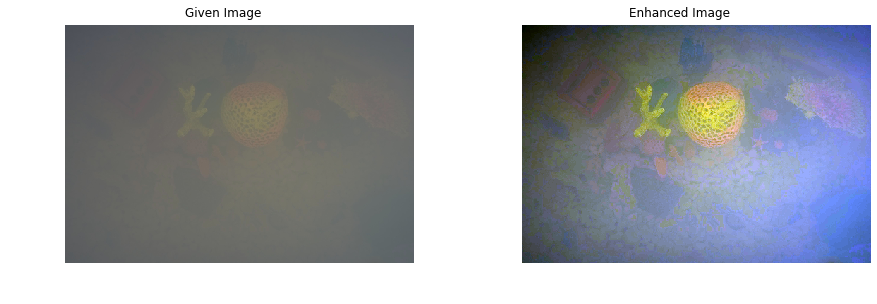

SDI Value for this Image
0.9679751755746658
Image Number:  18


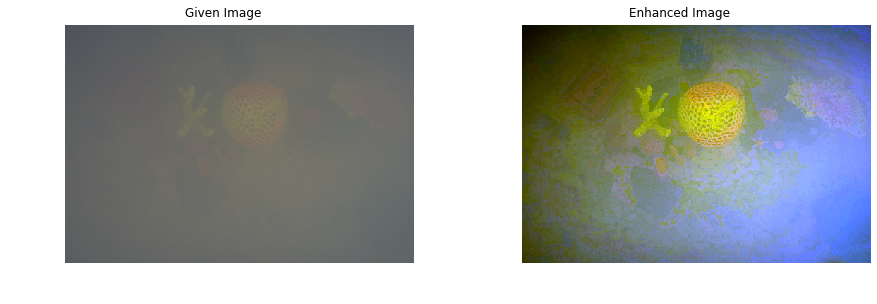

SDI Value for this Image
0.9913889915639669
Image Number:  19


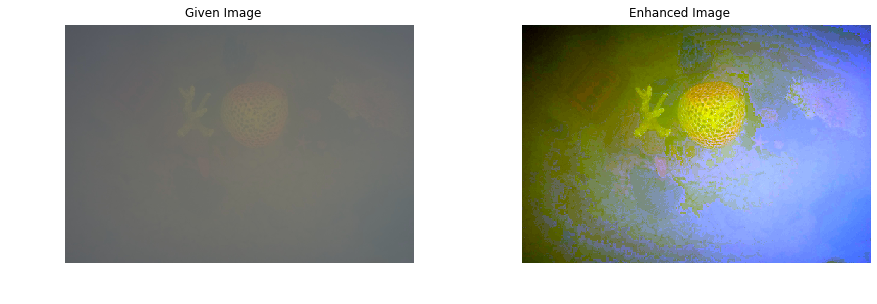

SDI Value for this Image
1.010199873943717


In [8]:
for i in range(2,20):
    print('Image Number: ',i)
    if(i<10):
        tempImageName = str(i)#+".jpg"
    else:
        tempImageName = "a"+str(i)#+".jpg"
    #read the image 
    tempGivenImage = cv2.imread(Resources+tempImageName+'GivenImage.png')
    tempGivenImage = cv2.cvtColor(tempGivenImage, cv2.COLOR_BGR2RGB)
    tempEnhancedImage = cv2.imread(Resources+tempImageName+'EnhancedImage.png')
    tempEnhancedImage = cv2.cvtColor(tempEnhancedImage, cv2.COLOR_BGR2RGB)
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    ax = axes.ravel()
    ax[0].imshow(tempGivenImage)
    ax[0].set_title("Given Image")
    ax[0].axis('off')
    ax[1].imshow(tempEnhancedImage)
    ax[1].set_title("Enhanced Image")
    ax[1].axis('off')
    plt.show()
    
    temp1 =0.0
    temp2 =0.0
    temp3 =0.0
    for j in range(0,3):
        tempGivenImagetemp = tempGivenImage[:,:,j:j+1]
        #find the objective function value and append to the list
        temp = objFunctionValue(tempGivenImagetemp)
        temp1 += temp[0]
        temp2 += temp[1]
        temp3 += temp[2]
    ssimtemp = ssim(OriginalImage, tempGivenImage,data_range=tempGivenImage.max() - tempGivenImage.min(),multichannel=True)
    print('SDI Value for this Image')
    print((1.0-ssimtemp)/0.639512208985103)
    ObjFuncValueForEachImage.append(temp1)
    EntropyObjFuncValueForEachImage.append(temp2)
    AvgGradObjFuncValueForEachImage.append(temp3)
    SDIValueForEachImage.append((1.0-ssimtemp)/0.639512208985103)
    tempGivenImage = tempGivenImage.astype(np.float64)
    temp = tempEnhancedImage
    TurbidMSEValueForEachImage.append(mse(OriginalImage,tempGivenImage))
    EnhancedMSEValueForEachImage.append(mse(OriginalImage,temp))

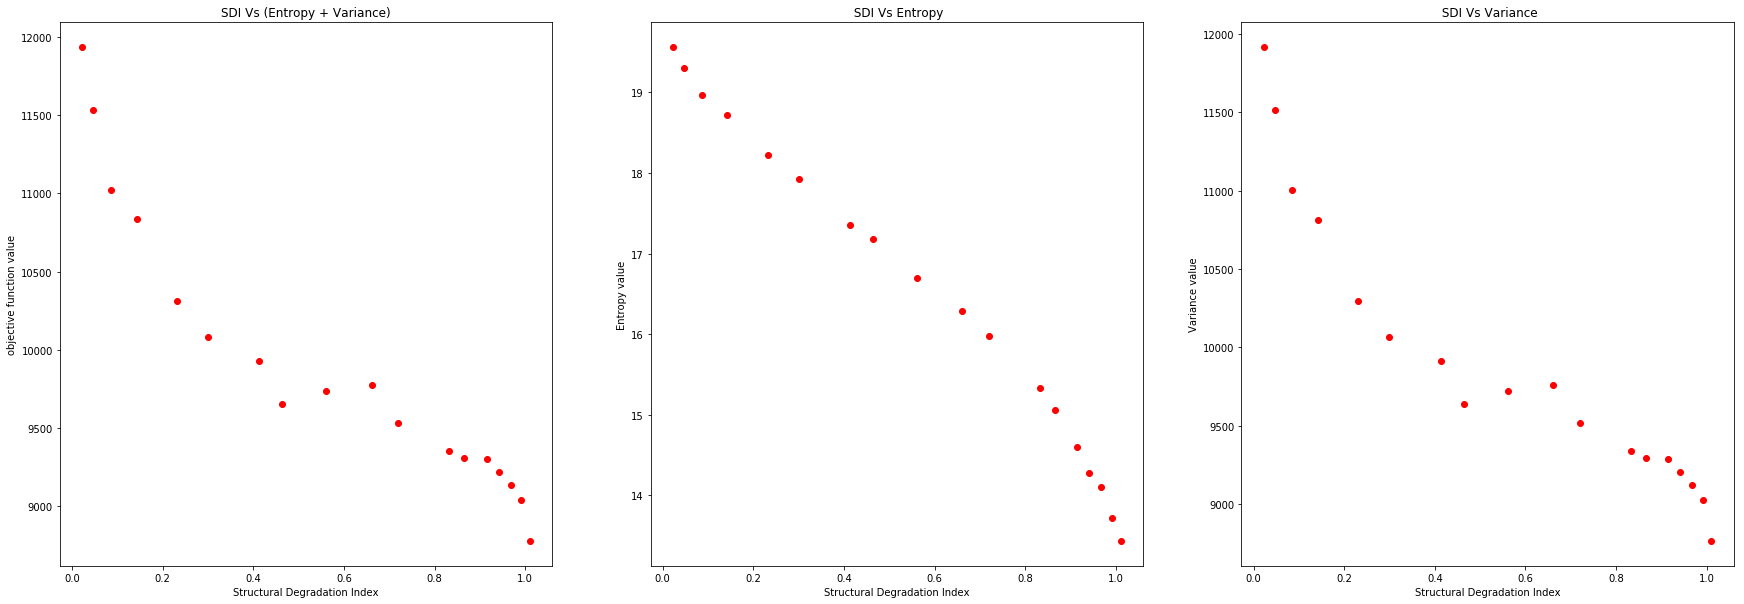

In [9]:
if(0):
    plt.figure(figsize=(5, 5))
    plt.plot(SDIValueForEachImage, TurbidMSEValueForEachImage, linestyle='--', marker='o', color='b',label = 'TubidImageMSE')
    plt.plot(SDIValueForEachImage, EnhancedMSEValueForEachImage, linestyle='-', marker='x', color='r',label = 'EnhancedImageMSE')
    #plt.plot(SDIValueForEachImage, MSEValueForEachImage, 'ro')
    plt.title('SDI Vs MSE with True Image')
    plt.xlabel('Structural Degradation Index')
    plt.ylabel('MSE')
    plt.legend(loc='best')
    plt.show()

#plot the graph
plt.figure(figsize=(30, 10))
plt.tight_layout()
plt.subplot(131)
plt.plot(SDIValueForEachImage, ObjFuncValueForEachImage, 'ro')
#plt.plot(range(0,len(ObjFuncValueForEachImage)), ObjFuncValueForEachImage, 'ro')
plt.title('SDI Vs (Entropy + Variance)')
plt.xlabel('Structural Degradation Index')
plt.ylabel('objective function value')
#plt.show()

plt.subplot(132)
plt.plot(SDIValueForEachImage, EntropyObjFuncValueForEachImage, 'ro')
#plt.plot(range(0,len(EntropyObjFuncValueForEachImage)), EntropyObjFuncValueForEachImage, 'ro')
plt.title(' SDI Vs Entropy')
plt.xlabel('Structural Degradation Index')
plt.ylabel('Entropy value')
#plt.show()

plt.subplot(133)
plt.plot(SDIValueForEachImage, AvgGradObjFuncValueForEachImage, 'ro')
#plt.plot(range(0,len(AvgGradObjFuncValueForEachImage)), AvgGradObjFuncValueForEachImage, 'ro')
plt.title(' SDI Vs Variance')
plt.xlabel('Structural Degradation Index')
plt.ylabel('Variance value')
#plt.tight_layout()
plt.show() 